# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [2]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [4]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

#woohooo mapbox works !!! 
# This code instantiates our file path using the Path Library 
# And, indexes the 'sfo_neighborhoods_census_data.csv' base file by 'year' 
# data matches the starter file ! 

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
"""BASE CELL 

    My cell *below* 
    so I can check my work as I go along

"""

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [7]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# DUPLICATE CELL - for my work 
# NEW DATAFRAME - 'sfo_data' spreads out the data distribution by 'YEAR' and 'NEIGHBORHOOD'. 
# I will slice data by 'YEAR' and 'NEIGHBORHOOD' and pass a mean function to calculate ALL neighborhoods within the provided time (i.e. 'YEAR').
# '.mean' represents total ousing units because it is not a neighborhood-by-neighborhood listing, but rather an aggregate # for the entire city. 
# Passing a '.mean' fn - would yield the same number as each entry is identical within a given year irrespective of neighborhood

sfo_data.head()
year = sfo_data.drop(columns=['sale_price_sqr_foot','gross_rent']).groupby(['year']).mean()
# To match the answers provided in both substance as well as format, I conducted a data slice, first dropping columns, then grouping the remaining dataframe by 'year'. 
# Finally, passing, '.mean()' fn to the dataframe.  Originally, I modified the 'sfo_data' dataframe, and tried to pass a '.head()' fn to the new dataframe. 
# However, given that data within the original DataFrame might still be needed, I instead provided an in-line edit then opted to 'print()' the output for one-time use


print(year)
year.head()

# in this case - I have included both =)

      housing_units
year               
2010         372560
2011         374507
2012         376454
2013         378401
2014         380348
2015         382295
2016         384242


,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348


In [8]:
# Save the dataframe as a csv file
# ''.to_csv is the default pandas fn to export so let's try it !

year.to_csv('c:/users/allen/year.csv', index=True, header=True)
print(year)

      housing_units
year               
2010         372560
2011         374507
2012         376454
2013         378401
2014         380348
2015         382295
2016         384242


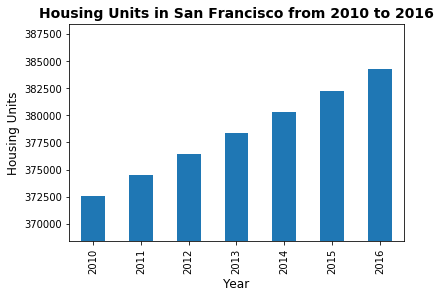

In [6]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

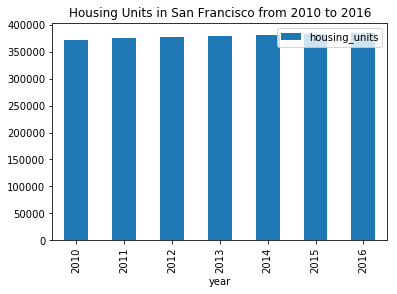

In [14]:
# Use the Pandas plot function to plot the average housing units per year.

year.plot( kind='bar',  title='Housing Units in San Francisco from 2010 to 2016')

# And the instructions were correct ! Way out of bounds. 

- - - 

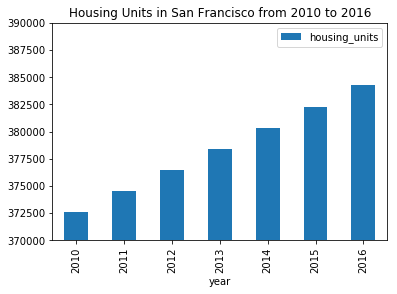

In [141]:
# Let's try again normalizing the y-axis 

year.plot( kind='bar',  ylim=(370000,390000), title='Housing Units in San Francisco from 2010 to 2016')
# Originally used 'range('') function, but that produced a huge result that took 30 mintes to run.  
# Switched over to 'ylim' fn and it ran great ! With a few tweaks, I got the scale to a more graduated bar char. Woohoo!

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [7]:
# Calculate the average sale price per square foot and average gross rent
# YOUR CODE HERE!

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


In [23]:
# Calculate the average sale price per square foot and average gross rent
# Data from our original dataframe 'sfo_data' will be used. Since we already instantiated the ojbect, we can call it's data, and prepare to slice. 

sfo_data.head()


,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [37]:
# To calculate avg sale price / and gross rent, each entry in the dataframe is unique (unlike the previous section; total housing units)
# to we will slice then, aggregate 

avg_cost = sfo_data.drop(columns=['neighborhood','housing_units','gross_rent']).groupby(['year']).mean()
avg_rent = sfo_data.drop(columns=['neighborhood','housing_units','sale_price_sqr_foot']).groupby(['year']).mean()    

columns=[avg_cost,avg_rent]
avg = pd.concat([avg_cost, avg_rent], axis = 1, join = 'inner')
avg.head()

# Maybe I'm crazy, but this was the easiest way I saw to create this final output.  
# I later found that both columns 'sale_price_sqr_foot' and 'gross_rent' could have been wrapped into one operation because both were passed the '.mean()' fn 
# For some reason, I thought that 'sale_price_sqr_foot' had to run the '.sum()' fn, thus ^ I broke the dataframe into 2 separate data objects to then concat 

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528


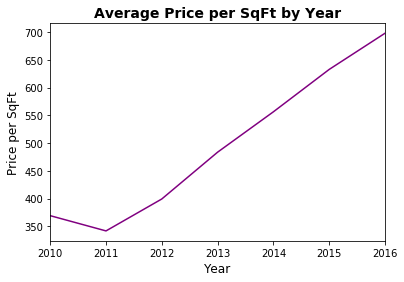

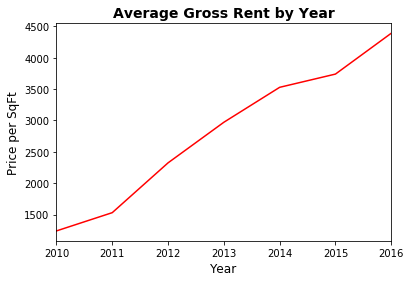

In [8]:
# ***BASE***  CELL - MY CODE IN THE CELL TO FOLLOW 


# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
# YOUR CODE HERE!


# Line chart for average montly rent
# YOUR CODE HERE!

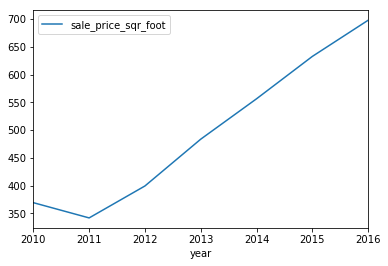

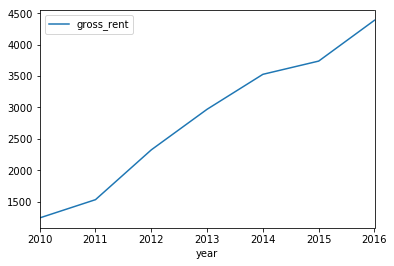

In [39]:
# SINCE I have already created both objects above, I can reuse them here !
# Line chart for average sale price per square foot

# YOUR CODE HERE!  #  'avg_cost' object represents avg price of $ per sq/ft. 
avg_cost.plot()

# Line chart for average montly rent
avg_rent.plot()

#Success ! 

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [9]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [45]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhood_df = sfo_data.groupby(['year','neighborhood']).mean()
neighborhood_df.head()

# although data parses first 5 lines + header, I have checked the entire dataframe and it is complete through to 2018. 


sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239

In [10]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [51]:
neighborhood_df.hvplot(x='year', y='sale_price_sqr_foot', groupby='neighborhood', hover_cols='all', title = ' Average Price per Sq/Ft San Francisco 2016-2018 ')

#Yess !!! I'm so excited this works 

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot,neighborhood,housing_units,gross_rent)

In [52]:
# Use hvplot to create an interactive line chart of the average monthly rent.
neighborhood_df.hvplot(x='year', y='gross_rent', groupby='neighborhood', hover_cols='all', title = ' Average Price per Sq/Ft San Francisco 2016-2018 ')


:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent,neighborhood,sale_price_sqr_foot,housing_units)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [12]:
# Getting the data from the top 10 expensive neighborhoods to own
# YOUR CODE HERE!

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [143]:
# Getting the data from the top 10 expensive neighborhoods to own
avg_by_neighborhood = neighborhood_df.groupby(['neighborhood']).mean()
top_ten = avg_by_neighborhood.sort_values(by='sale_price_sqr_foot',ascending=False).head(10)
top_ten
#completed_avg.sort_values(by='neighborhood', ascending=False)

#avg_by_neighborhood.sort_values(by='sale_price_sqr_foot', ascending=False)

# wow - I way overdid this cell. I tried to 'groupby' 2 columns, then 3 columns, 
# and I kept getting non-aggregating columns, where the output would show multiples of the same neighborhood 
# with no way of grouping again, and/or grouping & summing, then '.mean()' to the final solution. 
# Rather, ^ I should have just tried to GROUP and SORT only by 1 axis at a time. 
# Common theme for me, I try to do too much in 1 step rather than trying to take the coding langugage literally and walk through with baby steps 
# It worked in the end !

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


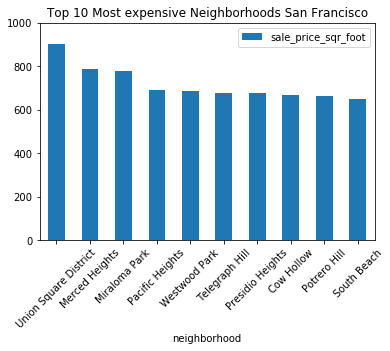

In [155]:
# Plotting the data from the top 10 expensive neighborhoods
top_ten.drop(columns=['housing_units','gross_rent']).plot(kind = 'bar', ylim = (0, 1000),title='Top 10 Most expensive Neighborhoods San Francisco', rot=45)


# This was kind of cool to do, as the default plot takes into account all other data, incuding housing_units, and gross_rent. 
# 'price_sqr_foot' happens to be the lowest amt, so I can do a dual or tri scale on the y-axis, or multiplot, with HV plot. 

In [158]:
# HV Plot also looks great ! 

top_ten.hvplot(kind = 'bar', ylim = (0, 1000),title='Top 10 Most expensive Neighborhoods San Francisco', rot=45)


:Bars   [neighborhood,Variable]   (value)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [14]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
# YOUR CODE HERE!

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [163]:
# Previous Dataframe called *below*
top_ten.head()

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000


In [183]:
# Plotting the data from the top 10 expensive neighborhoods
top_ten.hvplot.bar(x='neighborhood', y=['sale_price_sqr_foot','gross_rent'], groupby='neighborhood', stacked=True, alpha=.2, rot=45)

# wow looks amazing. 
# there are many other HVPlots that I can use as well, '.area',   or '.biviarate' or '.scatter' Ths one seems to look the best and is also scaled properly 

:DynamicMap   [neighborhood]
   :Bars   [neighborhood,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [16]:
# Load neighborhoods coordinates data
# YOUR CODE HERE!

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [187]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)
type(map_box_api)

#also checking to make sure that the correct token / api has been called. 
# TYPE renders a STRING in return. WOOHOO!!!

str

In [185]:
# Load neighborhoods coordinates data
file = Path('Data/neighborhoods_coordinates.csv')   #create the fild path and call upon Python PATH library to point to file 
coordinates = pd.read_csv(file)  #pandas "read" fn 
coordinates.head()   #checking our data - it matches the cell above. 

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [17]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [236]:
mean_values = sfo_data.groupby(['neighborhood']).mean()
mean_values.reset_index(inplace=True)
mean_values

# Original Dataframe created 'sfo_data' and I ran a '.groupby' fn to pass the aggregation by neighborhood 
# then completing the line with a 'mean()' fn to match the cell above. 


,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.00,2817.285714
1,Anza Vista,373.382198,379050.00,3031.833333
2,Bayview,204.588623,376454.00,2318.400000
3,Bayview Heights,590.792839,382295.00,3739.000000
4,Bernal Heights,576.746488,379374.50,3080.333333
5,Buena Vista Park,452.680591,378076.50,2698.833333
6,Central Richmond,394.422399,378401.00,2817.285714
7,Central Sunset,423.687928,378401.00,2817.285714
8,Clarendon Heights,487.244886,376454.00,2250.500000
9,Corona Heights,587.539067,377232.80,2472.000000


In [18]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


In [318]:
# Join the average values with the neighborhood locations
# I'll use the pandas 'CONCAT' fn to join both dataframes 

joined = pd.concat([ coordinates, mean_values], axis =1 )
joined.drop(columns=['neighborhood'], inplace=True)
joined.head()

# This one was a bit tricker !  
# When I groupby my previous dataframe, it effectively dropped the index, leaving "neighborhood" as the index. 
# this was causing NAN conflicts in my concat - output. 
# I had to go up a few cells to '.reset_index' 'mean_values' DF in order to be able to to join on the index axis 
# SUCCESS ! Only thing left to do in this cell was to drop the extra "neighborhood" columns, passing an 'inplace=True' modifyer 
# Now we have the correct dataframe with ALL the data

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,576.746488,379374.5,3080.333333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

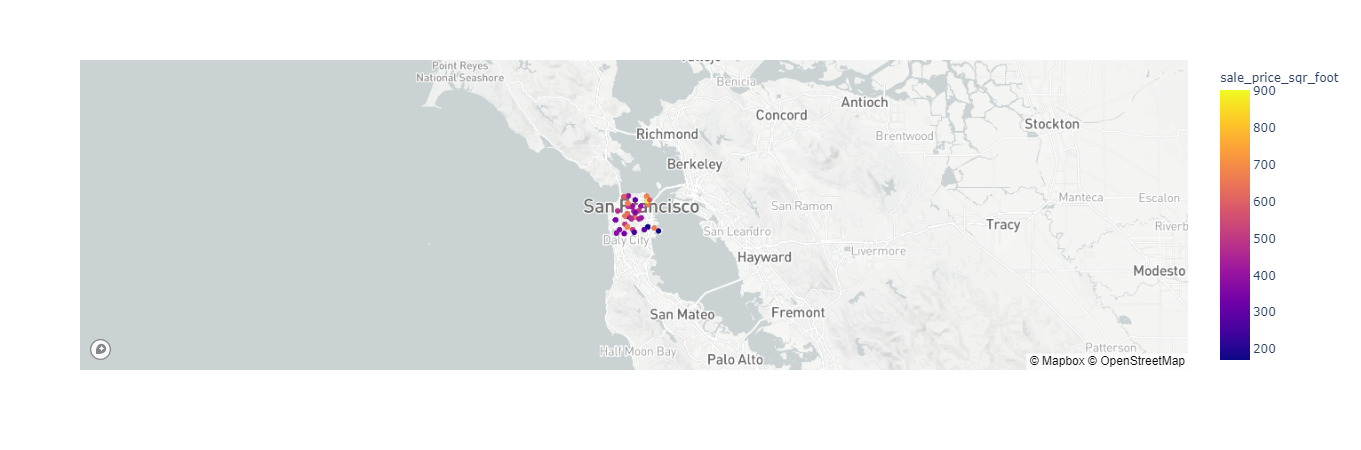

In [246]:
# Set the mapbox access token
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)
type(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
cost_map = px.scatter_mapbox(joined, lat="Lat", lon="Lon", color="sale_price_sqr_foot")
cost_map.show()

# Beautiful !

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [20]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560,1239
31,2010,Miraloma Park,680.608729,372560,1239
41,2010,Pacific Heights,496.516014,372560,1239
46,2010,Potrero Hill,491.450004,372560,1239
47,2010,Presidio Heights,549.417931,372560,1239


In [259]:
df_expensive_neighborhoods_per_year = sfo_data[sfo_data["neighborhood"].isin(joined["Neighborhood"])]
df_expensive_neighborhoods_per_year.reset_index(inplace=True)
df_expensive_neighborhoods_per_year.sort_values(by='year',ascending=True)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
30,2010,Mission Bay,489.805378,372560,1239
31,2010,Mission Dolores,257.987999,372560,1239
32,2010,Mission Terrace,262.876026,372560,1239
33,2010,Nob Hill,307.677477,372560,1239
34,2010,Noe Valley,381.138445,372560,1239
35,2010,Oceanview,282.119671,372560,1239
36,2010,Outer Parkside,432.195292,372560,1239
37,2010,Outer Sunset,368.311552,372560,1239
38,2010,Pacific Heights,496.516014,372560,1239


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year
px.parallel_coordinates(df_expensive_neighborhoods_per_year, color = ('neighborhood'))

# My parellel Coordinates failed multiple times.  Hopefully it works for you on your machine ! 

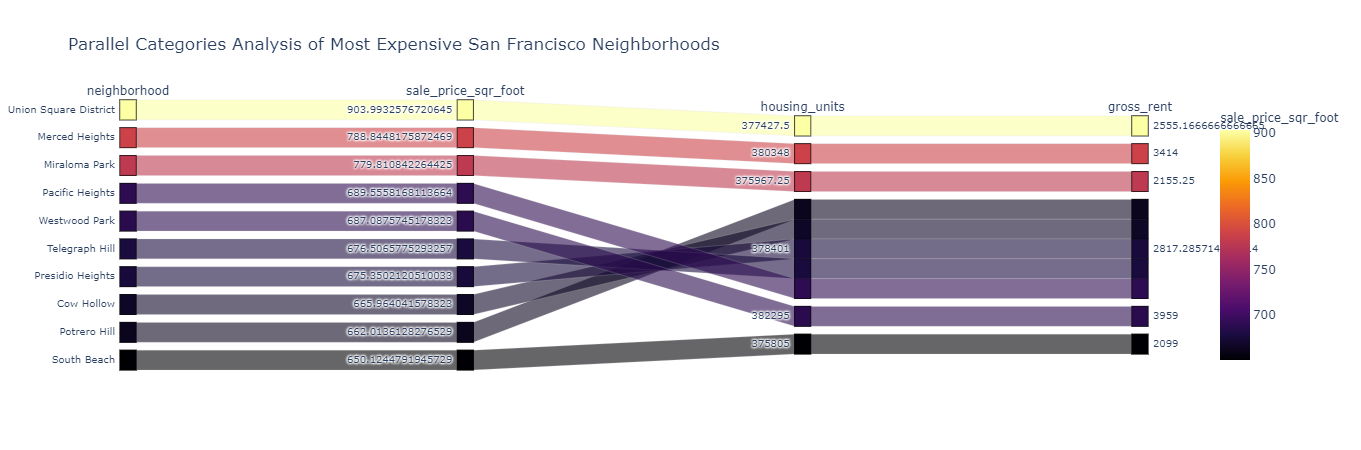

In [21]:
# Parallel Categories Plot
px.parallel_coordinates(df_expensive_neighborhoods_per_year, color = ('neighborhood'))


### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

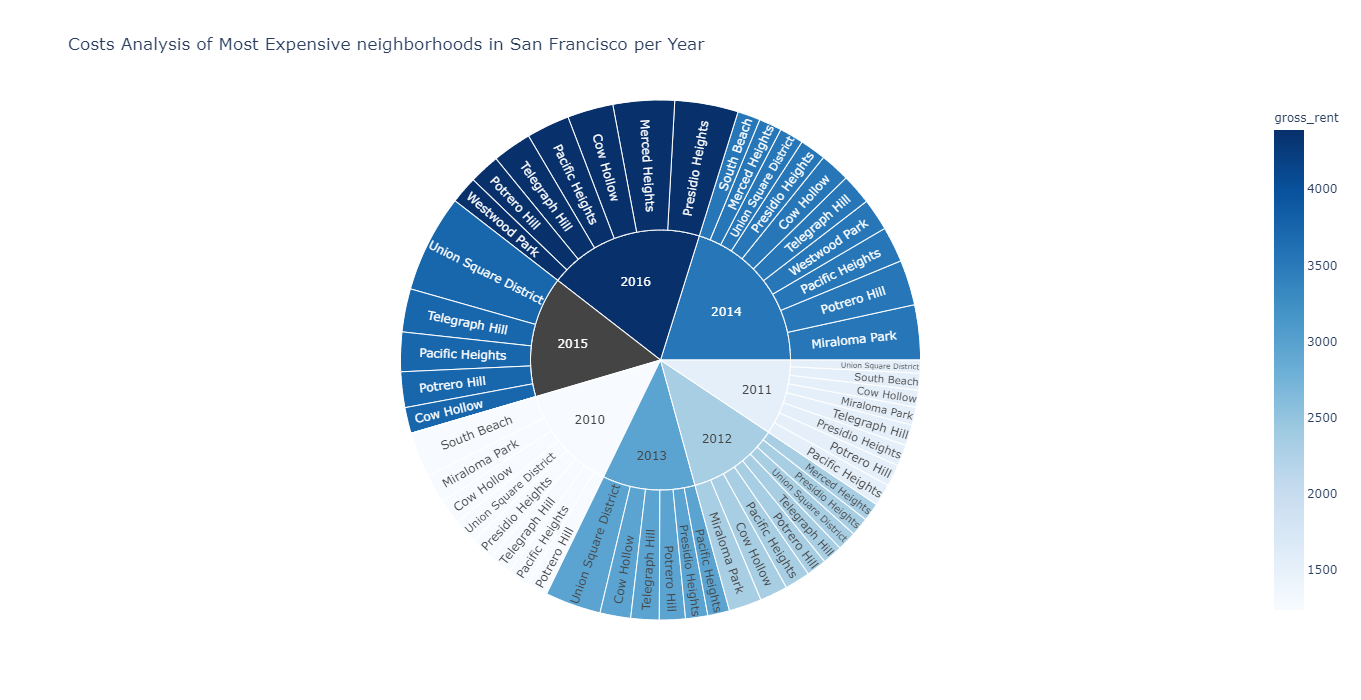

In [23]:
# Sunburst Plot
sunburst = px.sunburst(df_expensive_neighborhoods_per_year)
sunburst.fig_show()

### Citing my Sources

1. https://medium.com/analytics-vidhya/how-to-create-an-interactive-dashboard-in-python-using-holoviz-panel-2de350b6d8df
2. https://www.google.com/search?q=Invalid+element(s)+received+for+the+%27color%27+property+of+parcoords.line&oq=Invalid+element(s)+received+for+the+%27color%27+property+of+parcoords.line&aqs=chrome..69i57.171j0j1&sourceid=chrome&ie=UTF-8
3.https://plotly.com/python/sunburst-charts/
4. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html
5. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html